# CUSTOMER CHURN PREDICTION


### UNDERSTANDING THE DATA

In [1]:
import numpy as np
import pandas as pd  #for data manipulation and analysis
import os
os.getcwd()
data=pd.read_csv("Churn.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [2]:
data.head()   #To see the first five Row's

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data=data.drop('customerID',axis=1)   #to drop the column which is not usefull for predictions

In [4]:
import warnings
warnings.filterwarnings('ignore')
data[data.iloc[:,:]==' ']=np.NaN

In [5]:
data['TotalCharges']=data['TotalCharges'].astype(float)
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [6]:
data=data.fillna(data.mean())

In [7]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
col=data.columns
col

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### DATA PREPROCESSING

In [9]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for i in col:
    data[i]=le.fit_transform(data[i])

In [10]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,142,74,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,498,3624,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,436,536,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,266,3570,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,729,674,1


In [11]:
cd=data.iloc[:,-1]
de=data.iloc[:,0:-1]

In [12]:
from sklearn.feature_selection import SelectKBest, chi2
test_data=SelectKBest(score_func=chi2,k=4)
fit=test_data.fit(de, cd)
features=fit.transform(de)
features

array([[   1,    0,  142,   74],
       [  34,    1,  498, 3624],
       [   2,    0,  436,  536],
       ...,
       [  11,    0,  137, 1265],
       [   4,    0,  795, 1157],
       [  66,    2, 1388, 6151]], dtype=int64)

In [13]:
np.set_printoptions(precision=3)
print(fit.scores_)

[2.587e-01 1.344e+02 8.241e+01 1.330e+02 1.628e+04 9.726e-02 9.747e+00
 9.821e+00 5.516e+02 2.301e+02 1.913e+02 5.233e+02 7.490e+00 8.235e+00
 1.116e+03 1.057e+02 5.849e+01 7.945e+04 4.572e+05]


In [14]:
dt=['Partner','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','TechSupport','StreamingTV','StreamingMovies','PaymentMethod','MonthlyCharges','TotalCharges']

### DATA SCALING

In [15]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
dq=data.loc[:,dt]
std_sc=StandardScaler()
de=std_sc.fit_transform(de)
dq=std_sc.fit_transform(dq)

In [16]:
de

array([[-1.01 , -0.44 ,  1.035, ...,  0.399, -1.132, -1.56 ],
       [ 0.991, -0.44 , -0.967, ...,  1.335, -0.388,  0.269],
       [ 0.991, -0.44 , -0.967, ...,  1.335, -0.517, -1.322],
       ...,
       [-1.01 , -0.44 ,  1.035, ...,  0.399, -1.142, -0.946],
       [ 0.991,  2.273,  1.035, ...,  1.335,  0.233, -1.002],
       [ 0.991, -0.44 , -0.967, ..., -1.474,  1.472,  1.57 ]])

In [17]:
dq

array([[ 1.035,  0.063, -1.183, ...,  0.399, -1.132, -1.56 ],
       [-0.967, -0.992, -1.183, ...,  1.335, -0.388,  0.269],
       [-0.967, -0.992, -1.183, ...,  1.335, -0.517, -1.322],
       ...,
       [ 1.035,  0.063, -1.183, ...,  0.399, -1.142, -0.946],
       [ 1.035,  1.117,  0.172, ...,  1.335,  0.233, -1.002],
       [-0.967, -0.992,  0.172, ..., -1.474,  1.472,  1.57 ]])

### DATA VISUALISATION

In [18]:
cd.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [19]:
#To plot the data we use 'Seaborn' and 'Matplotlib'.
import matplotlib.pyplot as plt
import seaborn as sb 
#plot=data.corr()
#sb.heatmap(plot)


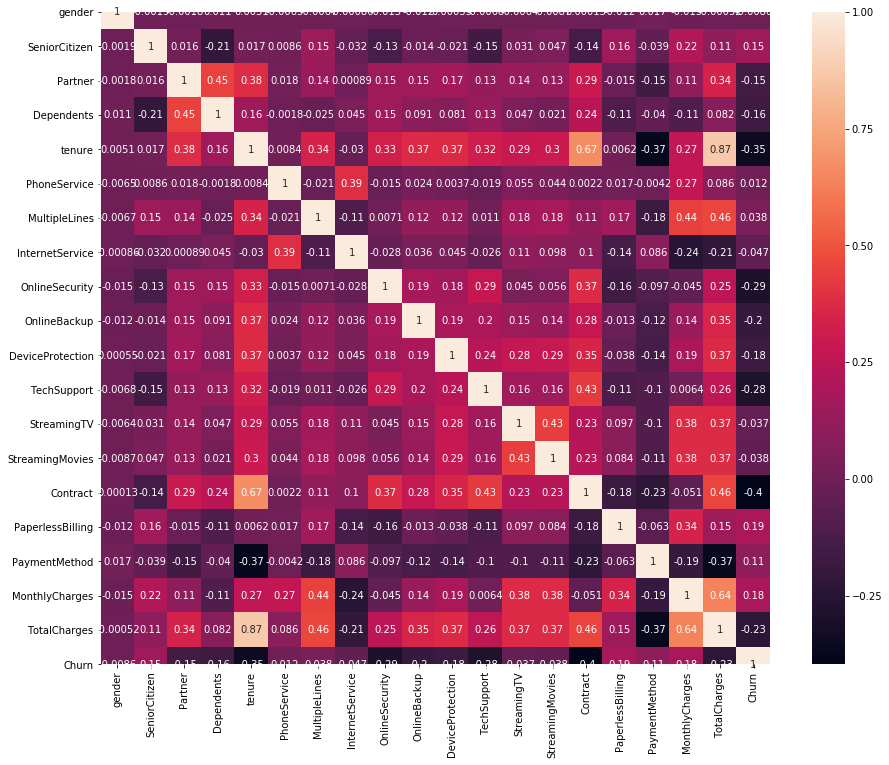

In [20]:
#this shows the correlation between the variables
plt.figure(figsize = (15,12))
sb.heatmap(data.corr(),annot = True )

### MACHINE LEARNING MODELS

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( de, cd, test_size=0.2, random_state=72)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (5634, 19) (5634,)
Test set: (1409, 19) (1409,)


In [22]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=37), threshold='median')
select.fit(X_train, Y_train)

X_train_s = select.transform(X_train)

print('The shape of x_train: ',X_train.shape)
print('The shape of x_train_s: ',X_train_s.shape)

The shape of x_train:  (5634, 19)
The shape of x_train_s:  (5634, 10)


Text(0.5, 0, 'Index of features')

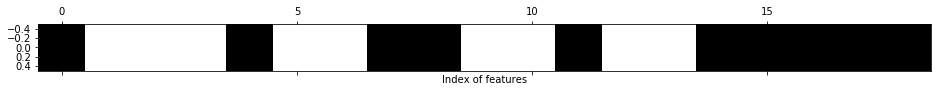

In [23]:
#As we can see in above feature selection process, we got 10 most relevent features out of 19 from our training data.
#We can see here black colored area shows all those features are relevent and selected
mask=select.get_support()
plt.matshow(mask.reshape(1,-1), cmap='gray_r')
plt.xlabel('Index of features')

In [24]:
f1=[]
acc=[]
n=150
for i in range(n):
    X_train, X_test, Y_train, Y_test = train_test_split(de, cd, test_size=0.3, random_state=0)

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

#models used for finding f1_score and accuracy

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [25]:
#LOGISTIC REGRESSION

print("LOGISTIC REGRESSION : ")
lr=LogisticRegression(random_state=0, solver='liblinear')
lr.fit(X_train, Y_train)
pred=lr.predict(X_test)

f1.append(f1_score(Y_test, pred, average='weighted'))
acc.append(accuracy_score(Y_test, pred))

print("Avg F1-Score",np.mean(f1))
print("Max F1-Score", np.max(f1))
print("Min F1-Score", np.min(f1))
print("Avg Accuracy", np.mean(acc))
print("Max Accuracy", np.max(acc))
print("Min Accuracy", np.min(acc))


LOGISTIC REGRESSION : 
Avg F1-Score 0.7902818293736578
Max F1-Score 0.7902818293736578
Min F1-Score 0.7902818293736578
Avg Accuracy 0.7979176526265973
Max Accuracy 0.7979176526265973
Min Accuracy 0.7979176526265973


In [26]:
#SUPPORT VECTOR MACHINE

print("SUPPORT VECTOR MACHINE : ")
svm= SVC(kernel='linear')
svm.fit(X_train, Y_train)
pred1=svm.predict(X_test)

f1.append(f1_score(Y_test, pred1, average='weighted'))
acc.append(accuracy_score(Y_test, pred1))

print("Avg F1-Score", np.mean(f1))
print("Max F1-Score", np.max(f1))
print("Min F1-Score", np.min(f1))
print("Avg Accuracy", np.mean(acc))
print("Max Accuracy", np.max(acc))
print("Min Accuracy", np.min(acc))

SUPPORT VECTOR MACHINE : 
Avg F1-Score 0.7846034726012494
Max F1-Score 0.7902818293736578
Min F1-Score 0.778925115828841
Avg Accuracy 0.7967345007098912
Max Accuracy 0.7979176526265973
Min Accuracy 0.795551348793185


In [27]:
#NAIVE BAYES

print("NAIVE BAYES : ")
nb=GaussianNB()
nb.fit(X_train, Y_train)
pred2=nb.predict(X_test)

f1.append(f1_score(Y_test, pred2, average='weighted'))
acc.append(accuracy_score(Y_test, pred2))

print("Avg F1-Score", np.mean(f1))
print("Max F1-Score", np.max(f1))
print("Min F1-Score", np.min(f1))
print("Avg Accuracy", np.mean(acc))
print("Max Accuracy", np.max(acc))
print("Min Accuracy", np.min(acc))

NAIVE BAYES : 
Avg F1-Score 0.7764695291409275
Max F1-Score 0.7902818293736578
Min F1-Score 0.7602016422202835
Avg Accuracy 0.7808802650260294
Max Accuracy 0.7979176526265973
Min Accuracy 0.7491717936583058


In [28]:
#RANDON FOREST CLASSIFIER

print("RANDOM FOREST CLASSIFIER : ")
rfc= RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(X_train, Y_train)
pred3=rfc.predict(X_test)
    
f1.append(f1_score(Y_test, pred3, average='weighted'))
acc.append(accuracy_score(Y_test, pred3))

print("Avg F1-Score", np.mean(f1))
print("Max F1-Score", np.max(f1))
print("Min F1-Score", np.min(f1))
print("Avg Accuracy", np.mean(acc))
print("Max Accuracy", np.max(acc))
print("Min Accuracy", np.min(acc))

RANDOM FOREST CLASSIFIER : 
Avg F1-Score 0.7785331733705361
Max F1-Score 0.7902818293736578
Min F1-Score 0.7602016422202835
Avg Accuracy 0.7837198296261241
Max Accuracy 0.7979176526265973
Min Accuracy 0.7491717936583058


Accuracy:   79.224  

[[1393  167]
 [ 272  281]] 



Text(26.5, 0.5, 'true values')

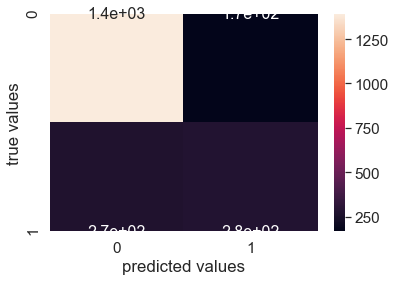

In [29]:
from sklearn import metrics
acr=metrics.accuracy_score(Y_test,pred3)
print("Accuracy:   %0.3f  \n" % (acr*100))

cm=metrics.confusion_matrix(Y_test, pred3, labels=[0,1])
print(cm,"\n")

sb.set(font_scale=1.4)
sb.heatmap(cm,annot=True, annot_kws={'size':16})
plt.xlabel("predicted values")
plt.ylabel("true values")

### DEEP LEARNING MODELS

In [30]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [31]:
import warnings
warnings.filterwarnings('ignore')
# Create the layers
classifier= Sequential()



# Adding the first hidden layer
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu', input_dim=19))

# Adding the second hidden layer
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))

# Add the final output layer
classifier.add(Dense(units=1, kernel_initializer = 'uniform', activation = 'sigmoid'))


In [32]:
import warnings
warnings.filterwarnings('ignore')# Compile the ANN
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# Fit the ANN to the data
classifier.fit(X_train, Y_train, batch_size=10, nb_epoch=100)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/100





4930/4930 [==============================] - 2s 363us/step - loss: 0.5149 - acc: 0.7331
Epoch 2/100
4930/4930 [==============================] - 1s 262us/step - loss: 0.4446 - acc: 0.7331
Epoch 3/100
4930/4930 [==============================] - 1s 281us/step - loss: 0.4334 - acc: 0.7899
Epoch 4/100
4930/4930 [==============================] - 1s 204us/step - loss: 0.4283 - acc: 0.8051
Epoch 5/100
4930/4930 [==============================] - 1s 198us/step - loss: 0.4249 - acc: 0.8061
Epoch 6/100
4930/4930 [==============================] - 1s 196us/step - loss: 0.4221 - acc: 0.8045
Epoch 7/100
4930/4930 [==============================] - 1s 215us/step - loss: 0.4208 - acc: 0.8045
Epoch 8/100
4930/4930 [==============================] - 1s 205us/step - loss: 0.4186 - acc: 0.8071
Epoch 9/100
4930/4930 [==============================] - 1s 199us/step - loss: 0.4166 - acc: 0.8

4930/4930 [==============================] - 1s 185us/step - loss: 0.3983 - acc: 0.8136
Epoch 60/100
4930/4930 [==============================] - 1s 183us/step - loss: 0.3971 - acc: 0.8168
Epoch 61/100
4930/4930 [==============================] - 1s 192us/step - loss: 0.3972 - acc: 0.8185
Epoch 62/100
4930/4930 [==============================] - 1s 198us/step - loss: 0.3970 - acc: 0.8110
Epoch 63/100
4930/4930 [==============================] - 1s 200us/step - loss: 0.3966 - acc: 0.8174
Epoch 64/100
4930/4930 [==============================] - 1s 258us/step - loss: 0.3970 - acc: 0.8160
Epoch 65/100
4930/4930 [==============================] - 2s 307us/step - loss: 0.3972 - acc: 0.8150
Epoch 66/100
4930/4930 [==============================] - 1s 217us/step - loss: 0.3969 - acc: 0.8162
Epoch 67/100
4930/4930 [==============================] - 1s 219us/step - loss: 0.3969 - acc: 0.8154
Epoch 68/100
4930/4930 [==============================] - 1s 216us/step - loss: 0.3965 - acc: 0.8164
Epo

In [33]:

from sklearn.metrics import confusion_matrix, accuracy_score

pred = classifier.predict(X_test)
pred = pred > 0.5

acr1=  accuracy_score(Y_test, pred)
print ("Accuracy on test set : ", acr1*100)

print ("\nConfusion Matrix : \n", confusion_matrix(Y_test, pred))

Accuracy on test set :  79.74443918599148

Confusion Matrix : 
 [[1404  156]
 [ 272  281]]


# THANK YOU